In [12]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [2]:
filename = 'Customer.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:

enc = OrdinalEncoder()
numeric_address = enc.fit_transform(pdf[['Gender']])
pdf['NumericGender'] = numeric_address

pdf.to_csv('Customer2.csv', index=False)

In [29]:
X = pdf.values[:,2:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0: 5]

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215, -0.00805849],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215, -0.00805849],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526, -0.00805849],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526, -0.00805849],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526, -0.00805849]])

In [13]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [15]:
pdf["labales_clustering"] = labels
pdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),NumericGender,labales_clustering
0,1,Male,19,15,39,1.0,1
1,2,Male,21,15,81,1.0,1
2,3,Female,20,16,6,0.0,1
3,4,Female,23,16,77,0.0,1
4,5,Female,31,17,40,0.0,1


Shape of area: (200,)


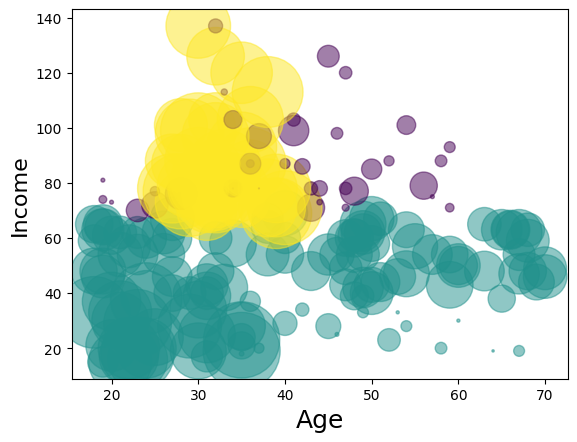

In [28]:
area = (np.pi * (X[:, 2])**2) / 10
area = area.astype(float)

# Check the shape of area
print("Shape of area:", area.shape)

# Plot the scatter plot
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()